## Hearthstone Decks Analysis

In [1]:
!pip install pyreclab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.2/267.2 kB 3.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import pyreclab
import seaborn as sns
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import requests
from io import StringIO

In [23]:
url = 'https://raw.githubusercontent.com/gustavo-cornejo/RecSist-Proyecto/refs/heads/main/archive/data.csv?token=GHSAT0AAAAAACV4L2U4FRQVMYSSVOUIAWJSZYLIKEQ'

response = requests.get(url)
data = pd.read_csv(StringIO(response.text))

data.head()

,craft_cost,date,deck_archetype,deck_class,deck_format,deck_id,deck_set,deck_type,rating,title,...,card_20,card_21,card_22,card_23,card_24,card_25,card_26,card_27,card_28,card_29
0,9740,2016-02-19,Unknown,Priest,W,433004,Explorers,Tavern Brawl,1,Reno Priest,...,374,2280,2511,2555,2566,2582,2683,2736,2568,2883
1,9840,2016-02-19,Unknown,Warrior,W,433003,Explorers,Ranked Deck,1,RoosterWarrior,...,1781,1781,2021,2021,2064,2064,2078,2510,2729,2736
2,2600,2016-02-19,Unknown,Mage,W,433002,Explorers,Theorycraft,1,Annoying,...,1793,1801,1801,2037,2037,2064,2064,2078,38710,38710
3,15600,2016-02-19,Unknown,Warrior,W,433001,Explorers,NaN,0,Standart pay to win warrior,...,1657,1721,2018,2296,2262,336,2729,2729,2736,2760
4,7700,2016-02-19,Unknown,Paladin,W,432997,Explorers,Ranked Deck,1,Palamix,...,2027,2029,2029,2064,2078,374,2717,2717,2889,2889


Con esta dataframe haremos un análisis de ciertos atributos propios de los mazos del juego Hearthstone. Para esto, replicaremos y compararemos los resultados del análisis ""

### 1. Número de mazos según la clase de héroe

In [24]:
mazos_por_clase = data['deck_class'].value_counts()

print(mazos_por_clase)

deck_class
Mage       45306
Priest     44307
Paladin    42266
Warlock    38022
Druid      37891
Shaman     36457
Warrior    35944
Rogue      34794
Hunter     31245
Name: count, dtype: int64


<ipython-input-25-b181d0a7cd46>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mazos_por_clase.index, y=mazos_por_clase.values, palette='viridis')


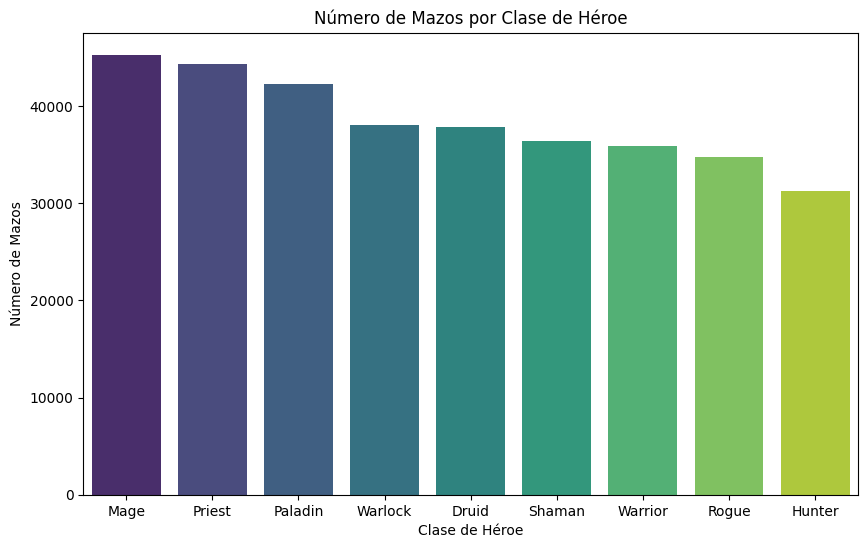

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.barplot(x=mazos_por_clase.index, y=mazos_por_clase.values, palette='viridis')

plt.xlabel('Clase de Héroe')
plt.ylabel('Número de Mazos')
plt.title('Número de Mazos por Clase de Héroe')

plt.show()

Se puede una predilección por usar mazos de ciertas clases, pero ninguno siendo mucho más utilizado que el resto. Sí se ve como hay una menor disposición a jugar mazos de Hunter.

## 2. Porcentaje de uso de cartas en mazos según la clase

In [45]:
import json

url = 'https://raw.githubusercontent.com/gustavo-cornejo/RecSist-Proyecto/refs/heads/main/archive/refs.json?token=GHSAT0AAAAAACV4L2U4TCKAJT76UHMQXXL6ZYLJIMA'

response = requests.get(url)
cartas_info = response.json()

In [56]:
id_a_nombre = {}
for carta in cartas_info:
    if 'dbfId' in carta and 'name' in carta:

        id_a_nombre[carta['dbfId']] = carta['name']
    else:
        continue

def calcular_porcentaje_cartas(df, clase):
    df_clase = df[df['deck_class'] == clase]

    df_clase_cartas_unicas = df_clase[cartas_cols].apply(lambda row: pd.Series(row.dropna().unique()), axis=1)

    cartas_usadas = df_clase_cartas_unicas.stack().value_counts()

    porcentaje_cartas = (cartas_usadas / len(df_clase)) * 100

    return porcentaje_cartas.nlargest(5)

Entrada sin 'dbfId' o 'name': {'cost': 0, 'id': 'PlaceholderCard'}
dbfId: 2518, Name: Crowd Favorite
dbfId: 1769, Name: Ben Thompson
dbfId: 10081, Name: Deviate Switch
dbfId: 40569, Name: Grimestreet Pawnbroker
dbfId: 1370, Name: Oasis Snapjaw


<ipython-input-57-3e7a60a7987a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres_cartas, y=porcentaje_cartas_clase.values, palette=colores_clases.get(clase, 'Blues_d'))


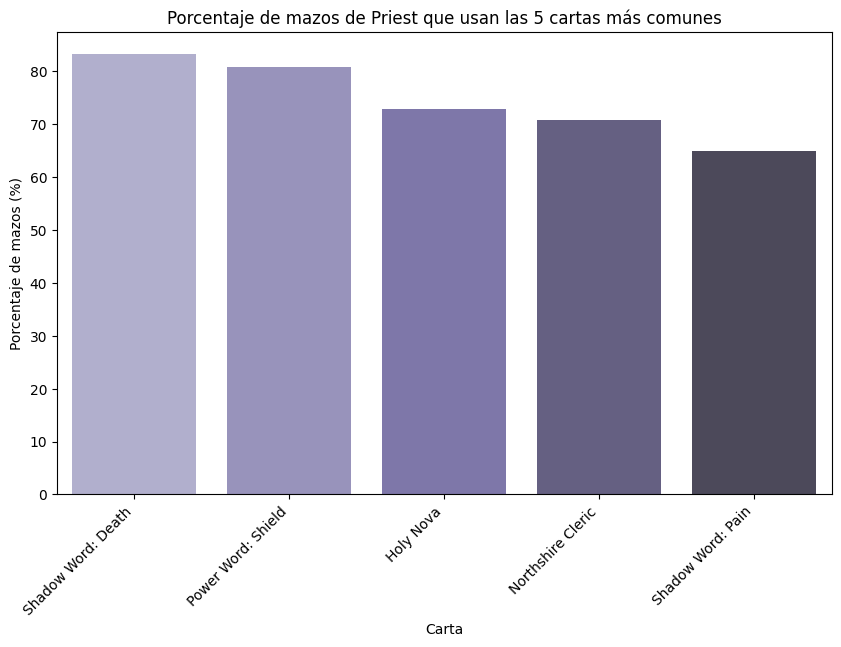

<ipython-input-57-3e7a60a7987a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres_cartas, y=porcentaje_cartas_clase.values, palette=colores_clases.get(clase, 'Blues_d'))


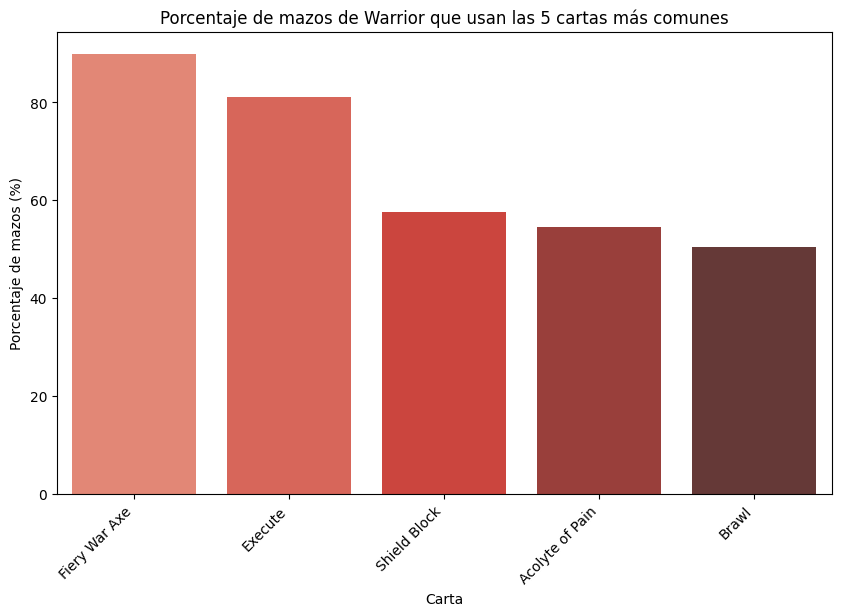

<ipython-input-57-3e7a60a7987a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres_cartas, y=porcentaje_cartas_clase.values, palette=colores_clases.get(clase, 'Blues_d'))


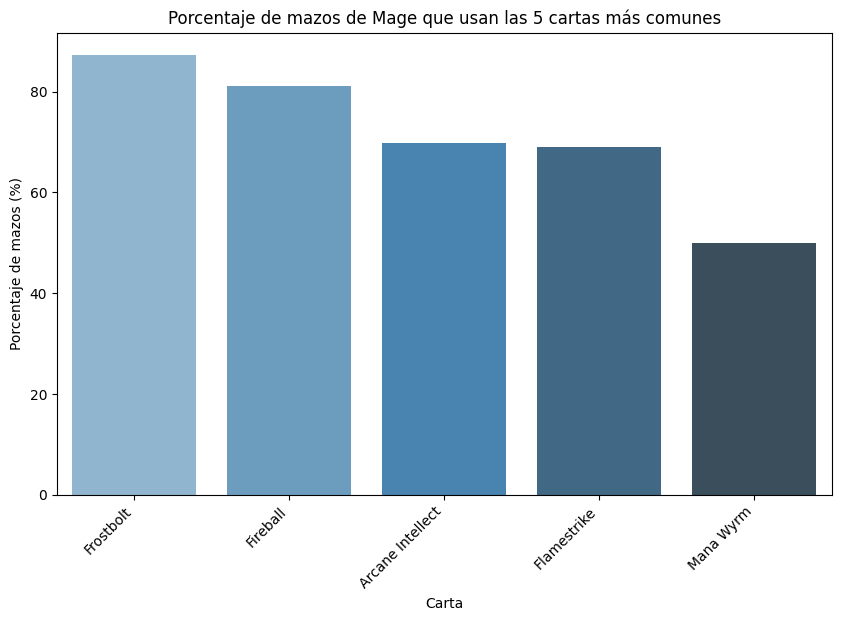

<ipython-input-57-3e7a60a7987a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres_cartas, y=porcentaje_cartas_clase.values, palette=colores_clases.get(clase, 'Blues_d'))


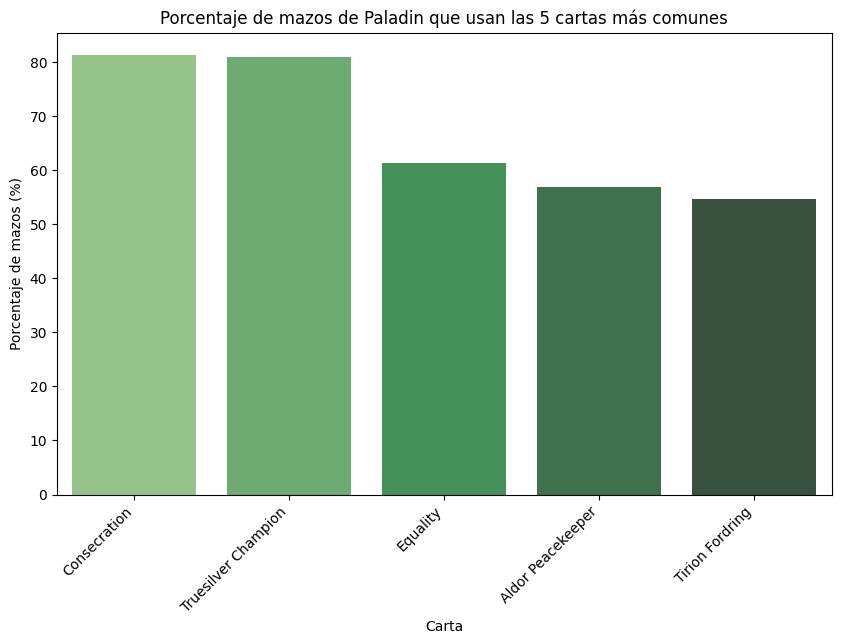

<ipython-input-57-3e7a60a7987a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres_cartas, y=porcentaje_cartas_clase.values, palette=colores_clases.get(clase, 'Blues_d'))


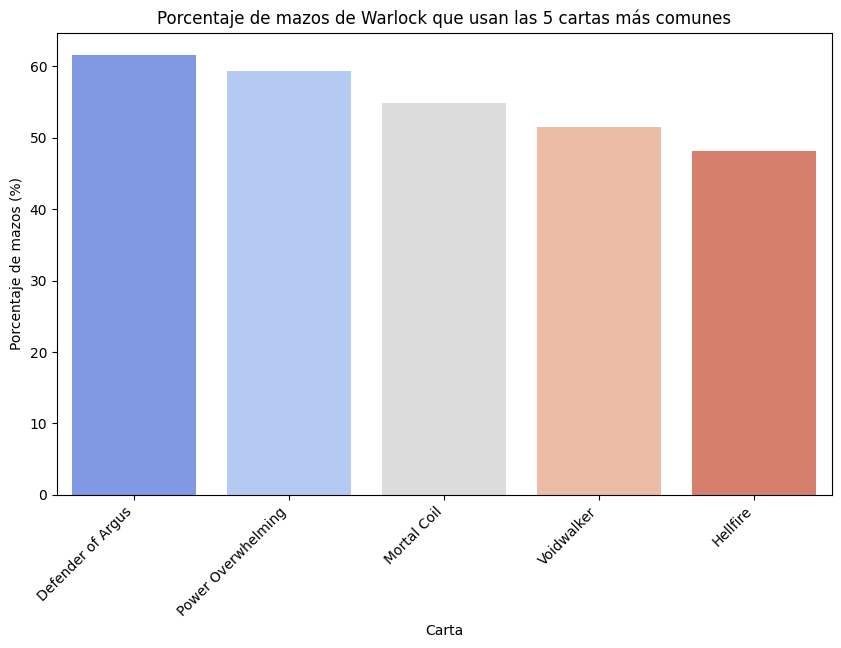

<ipython-input-57-3e7a60a7987a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres_cartas, y=porcentaje_cartas_clase.values, palette=colores_clases.get(clase, 'Blues_d'))


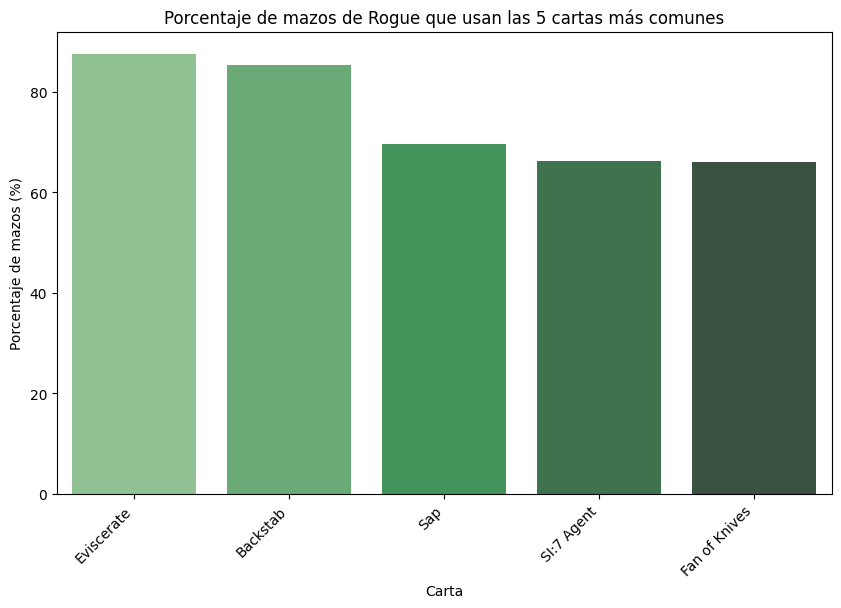

<ipython-input-57-3e7a60a7987a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres_cartas, y=porcentaje_cartas_clase.values, palette=colores_clases.get(clase, 'Blues_d'))


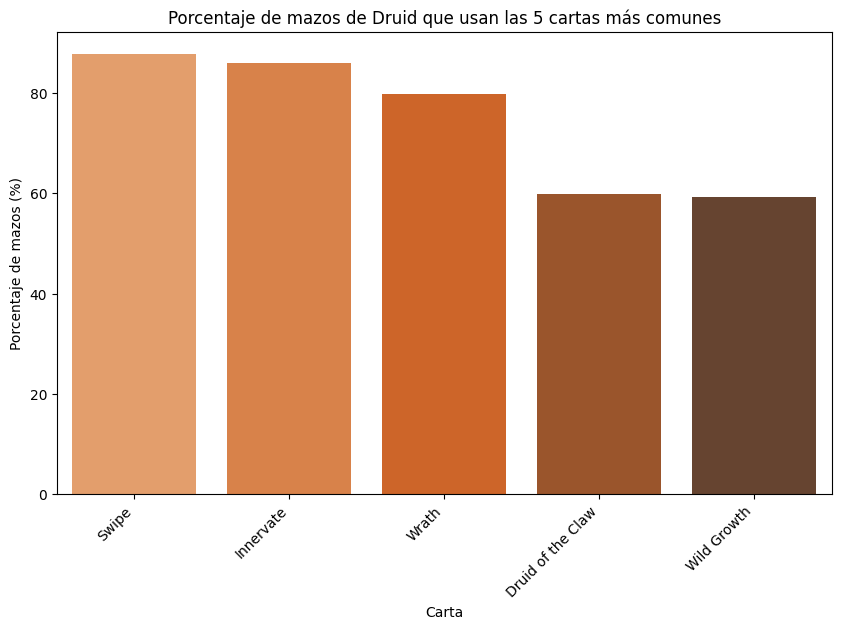

<ipython-input-57-3e7a60a7987a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres_cartas, y=porcentaje_cartas_clase.values, palette=colores_clases.get(clase, 'Blues_d'))


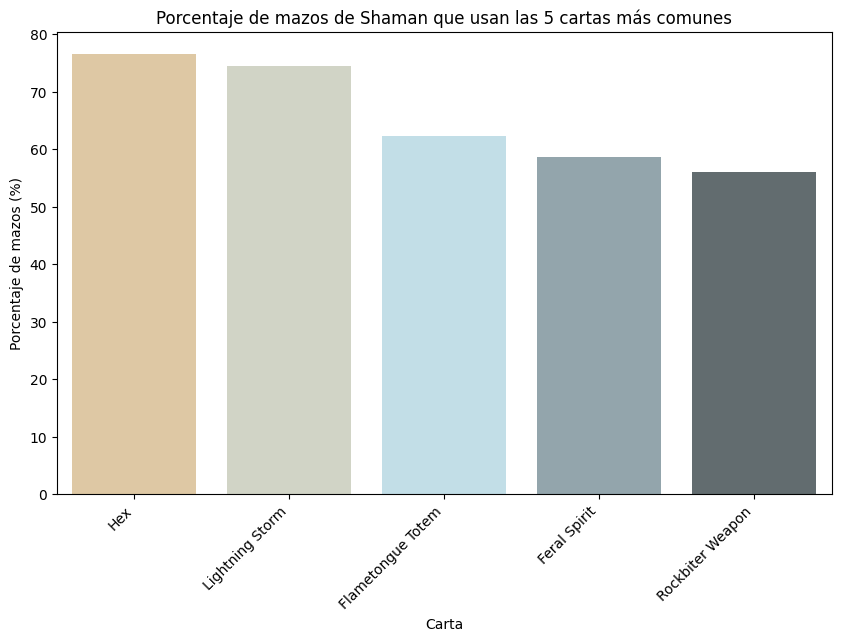

<ipython-input-57-3e7a60a7987a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres_cartas, y=porcentaje_cartas_clase.values, palette=colores_clases.get(clase, 'Blues_d'))


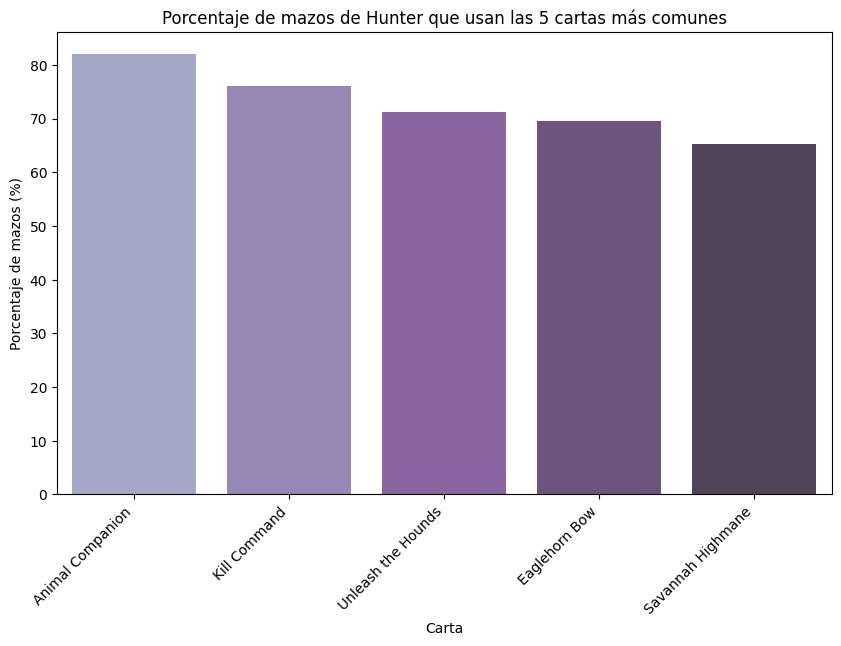

In [57]:
cartas_cols = [f'card_{i}' for i in range(30)]

colores_clases = {
    'Mage': 'Blues_d',
    'Warrior': 'Reds_d',
    'Priest': 'Purples_d',
    'Rogue': 'Greens_d',
    'Druid': 'Oranges_d',
    'Paladin': 'YlGn_d',
    'Hunter': 'BuPu_d',
    'Shaman': 'RdYlBu_d',
    'Warlock': 'coolwarm'
}

clases = data['deck_class'].unique()

for clase in clases:
    porcentaje_cartas_clase = calcular_porcentaje_cartas(data, clase)

    nombres_cartas = [id_a_nombre.get(card_id, card_id) for card_id in porcentaje_cartas_clase.index]

    plt.figure(figsize=(10,6))
    sns.barplot(x=nombres_cartas, y=porcentaje_cartas_clase.values, palette=colores_clases.get(clase, 'Blues_d'))

    plt.xticks(rotation=45, ha='right')

    plt.title(f'Porcentaje de mazos de {clase} que usan las 5 cartas más comunes')
    plt.ylabel('Porcentaje de mazos (%)')
    plt.xlabel('Carta')

    plt.show()

## 3. Coste de arquetipos según la Clase

<ipython-input-28-b3c2cfd4c7d3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deck_archetype', y='craft_cost', data=df_clase, palette=colores_clases.get(clase, 'Blues_d'))


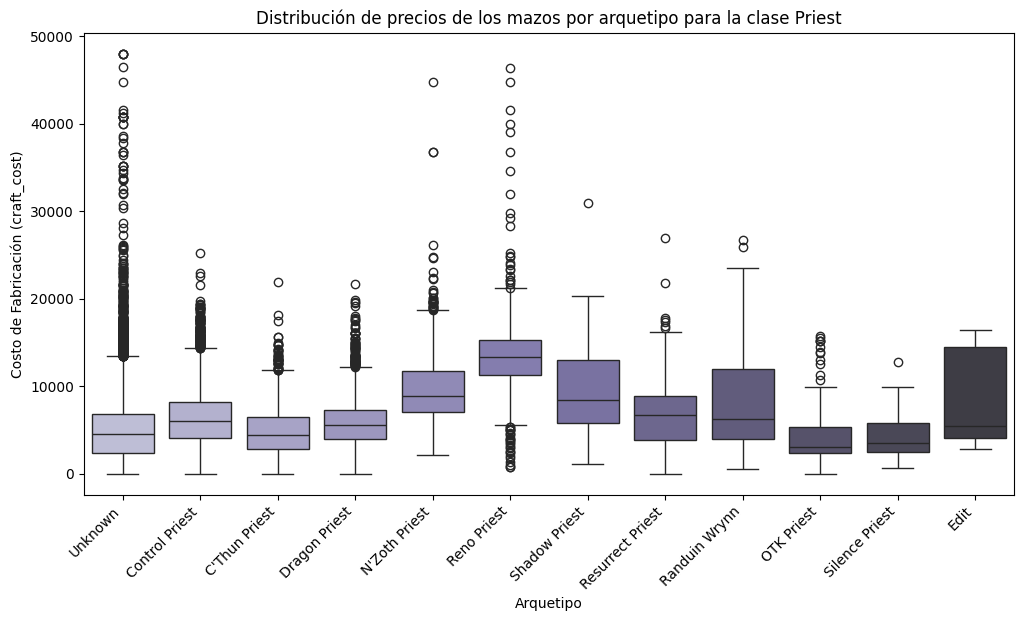

<ipython-input-28-b3c2cfd4c7d3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deck_archetype', y='craft_cost', data=df_clase, palette=colores_clases.get(clase, 'Blues_d'))


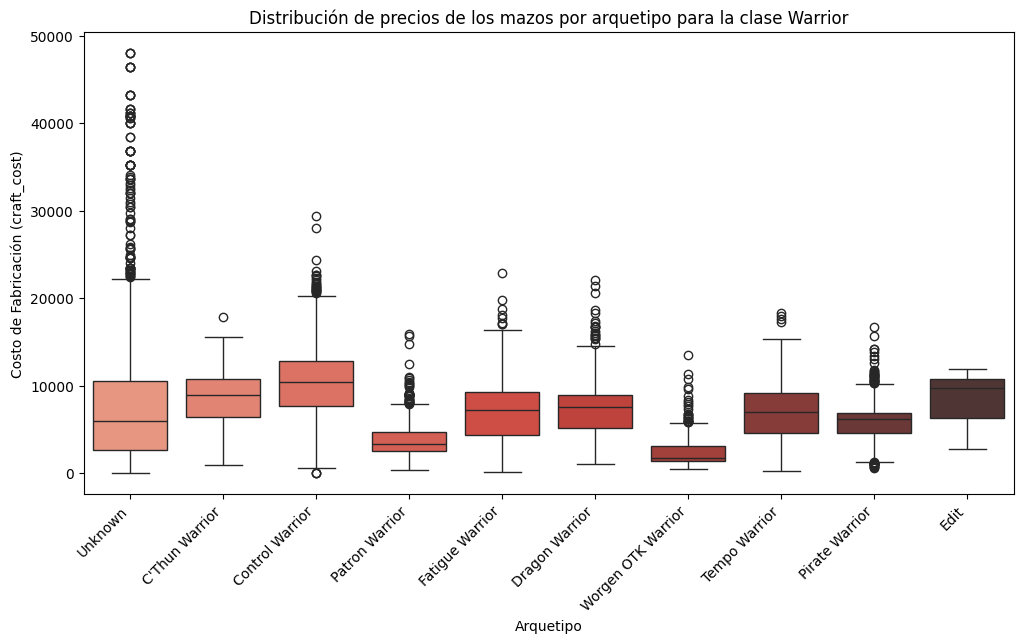

<ipython-input-28-b3c2cfd4c7d3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deck_archetype', y='craft_cost', data=df_clase, palette=colores_clases.get(clase, 'Blues_d'))


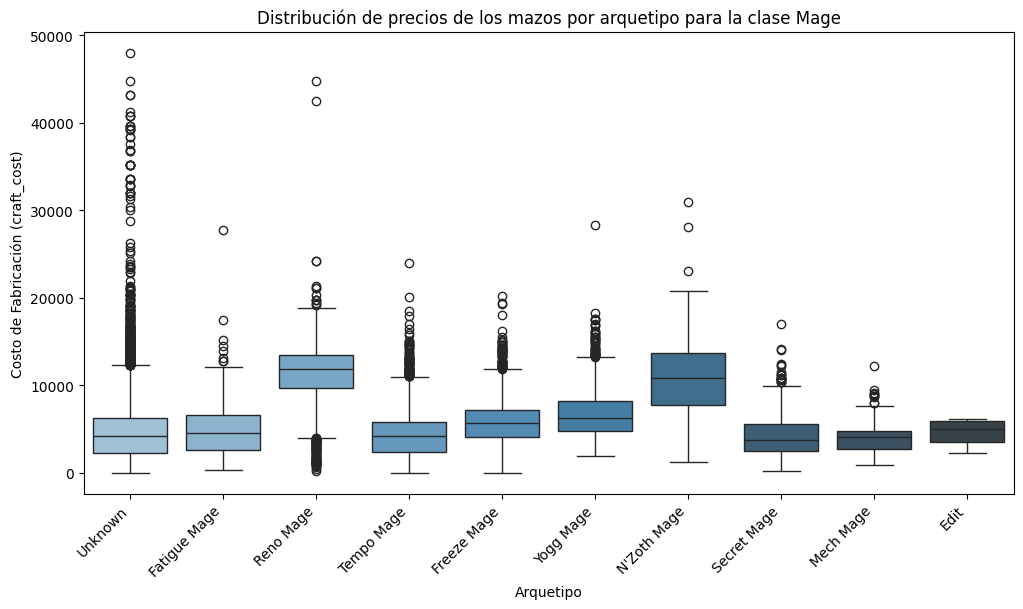

<ipython-input-28-b3c2cfd4c7d3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deck_archetype', y='craft_cost', data=df_clase, palette=colores_clases.get(clase, 'Blues_d'))


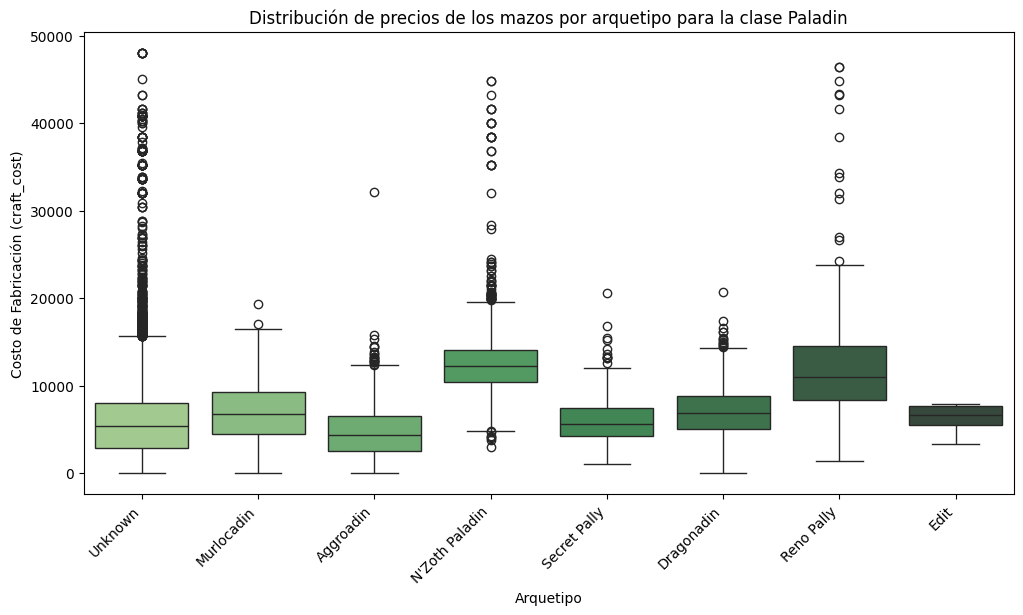

<ipython-input-28-b3c2cfd4c7d3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deck_archetype', y='craft_cost', data=df_clase, palette=colores_clases.get(clase, 'Blues_d'))


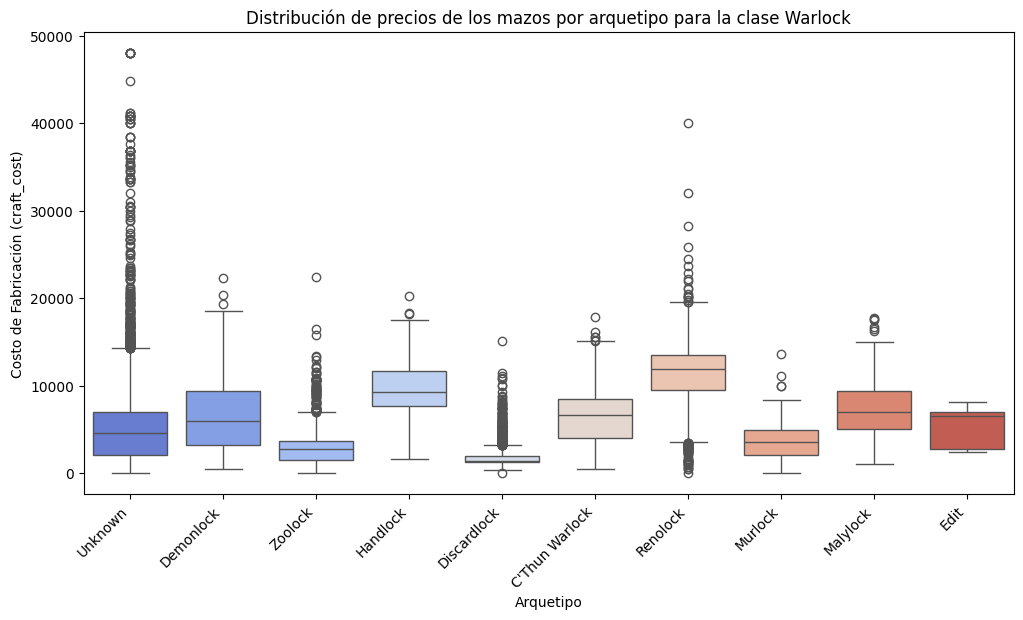

<ipython-input-28-b3c2cfd4c7d3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deck_archetype', y='craft_cost', data=df_clase, palette=colores_clases.get(clase, 'Blues_d'))


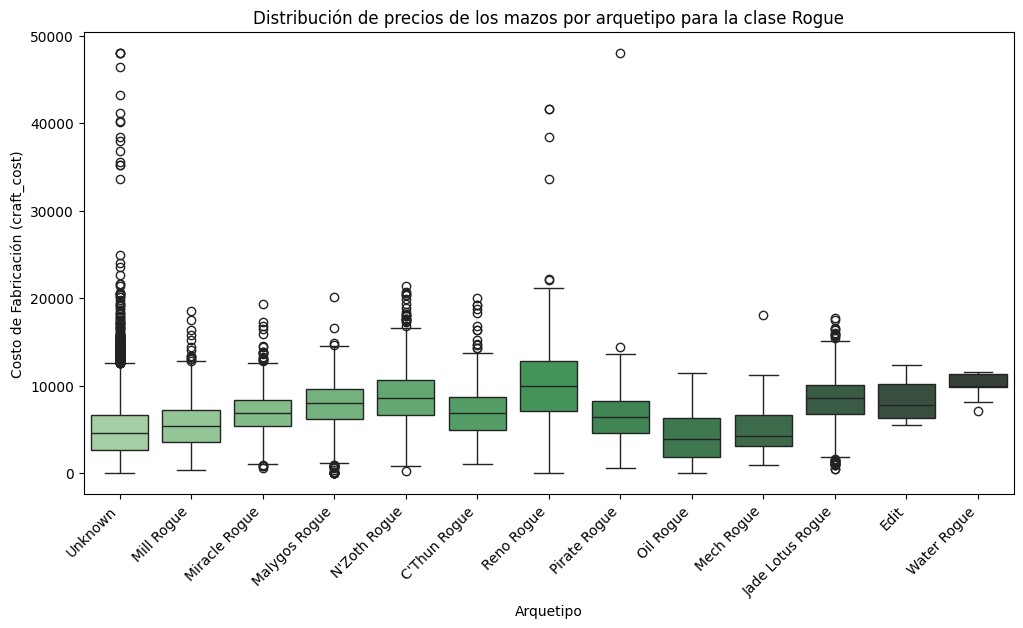

<ipython-input-28-b3c2cfd4c7d3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deck_archetype', y='craft_cost', data=df_clase, palette=colores_clases.get(clase, 'Blues_d'))


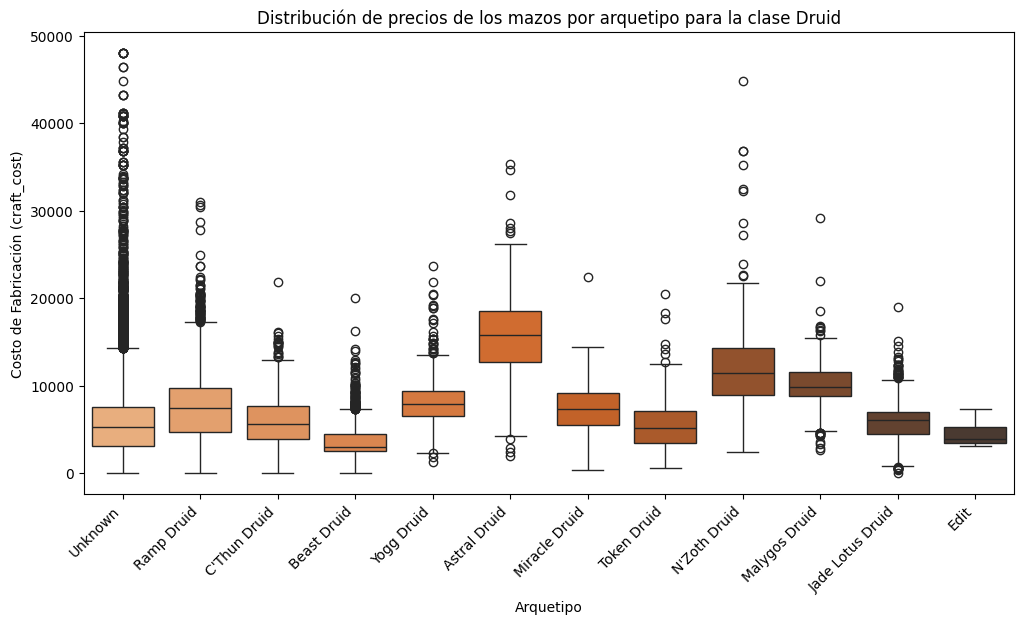

<ipython-input-28-b3c2cfd4c7d3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deck_archetype', y='craft_cost', data=df_clase, palette=colores_clases.get(clase, 'Blues_d'))


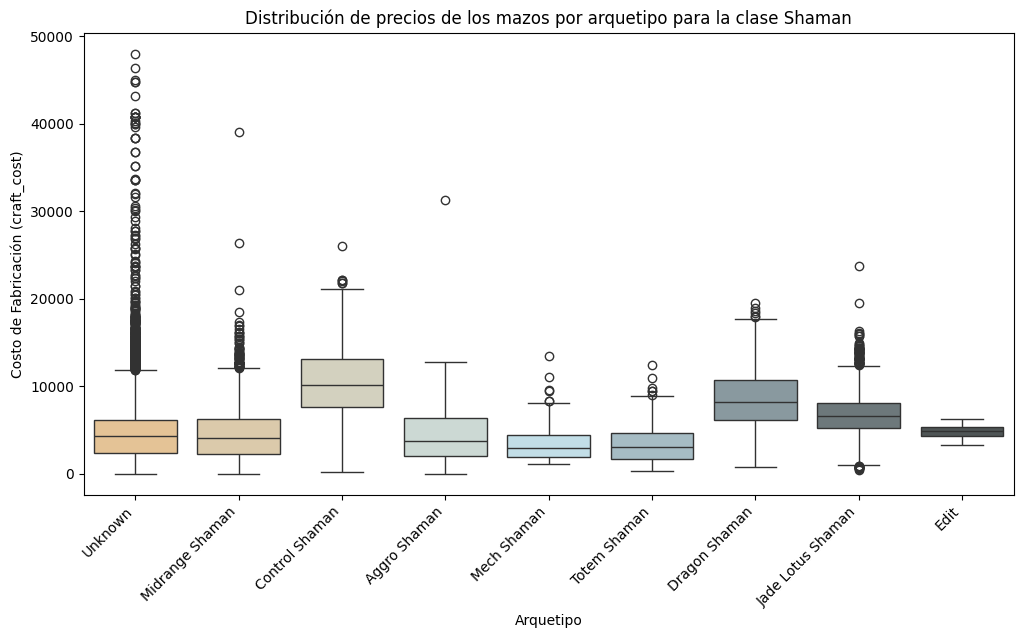

<ipython-input-28-b3c2cfd4c7d3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deck_archetype', y='craft_cost', data=df_clase, palette=colores_clases.get(clase, 'Blues_d'))


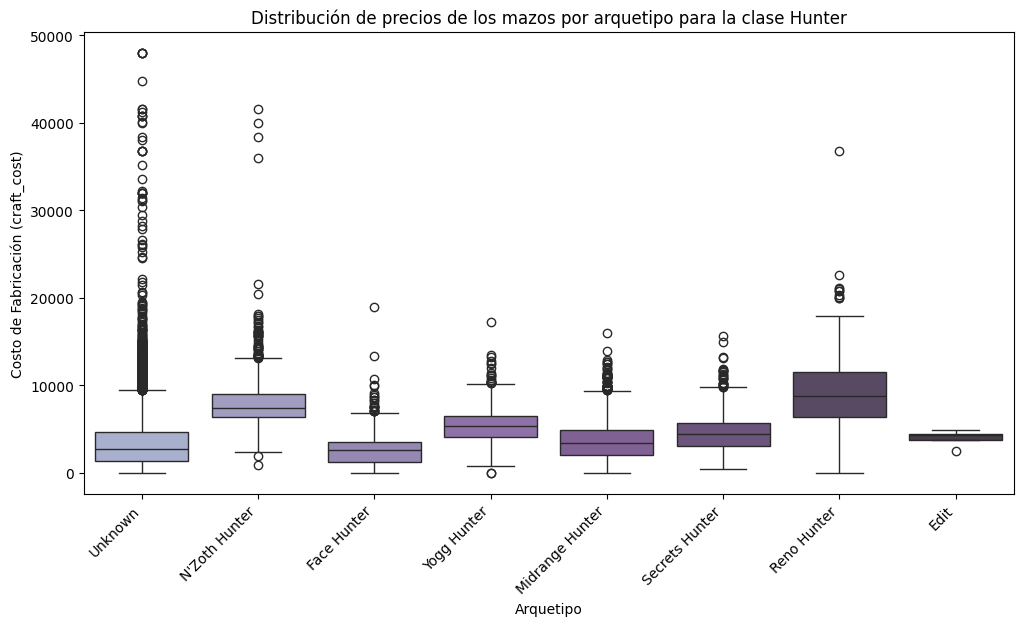

In [28]:
clases = data['deck_class'].unique()

for clase in clases:
    df_clase = data[data['deck_class'] == clase]

    if df_clase.empty:
        continue

    plt.figure(figsize=(12,6))
    sns.boxplot(x='deck_archetype', y='craft_cost', data=df_clase, palette=colores_clases.get(clase, 'Blues_d'))

    plt.xticks(rotation=45, ha='right')

    plt.title(f'Distribución de precios de los mazos por arquetipo para la clase {clase}')
    plt.ylabel('Costo de Fabricación (craft_cost)')
    plt.xlabel('Arquetipo')

    plt.show()

## 4. Clase mejor puntuada

### Puntuaciones Normales

<ipython-input-29-f41f88130db4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_puntuacion_por_clase.index, y=promedio_puntuacion_por_clase.values, palette='coolwarm')


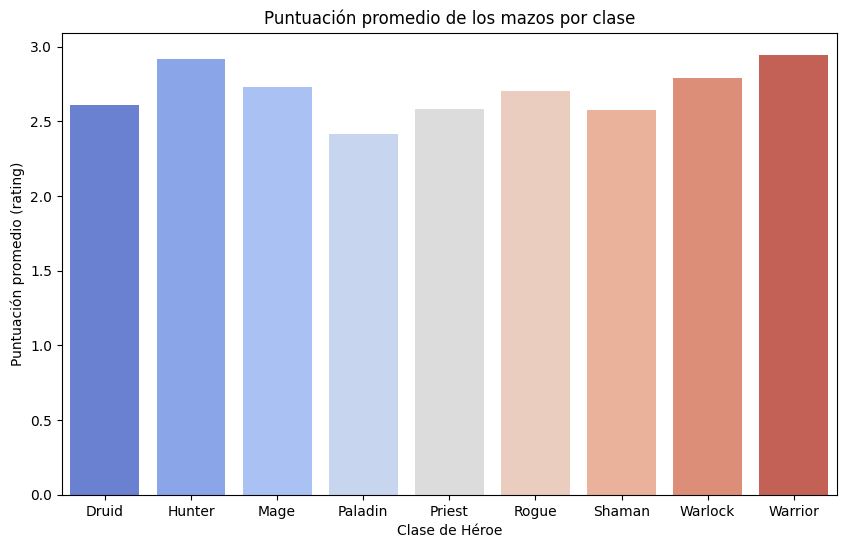

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

promedio_puntuacion_por_clase = data.groupby('deck_class')['rating'].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=promedio_puntuacion_por_clase.index, y=promedio_puntuacion_por_clase.values, palette='coolwarm')

plt.title('Puntuación promedio de los mazos por clase')
plt.ylabel('Puntuación promedio (rating)')
plt.xlabel('Clase de Héroe')

plt.show()

### Puntuaciones Normalizadas

<ipython-input-30-1b71cd3a0cb3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_normalizado_por_clase.index, y=promedio_normalizado_por_clase.values, palette='coolwarm')


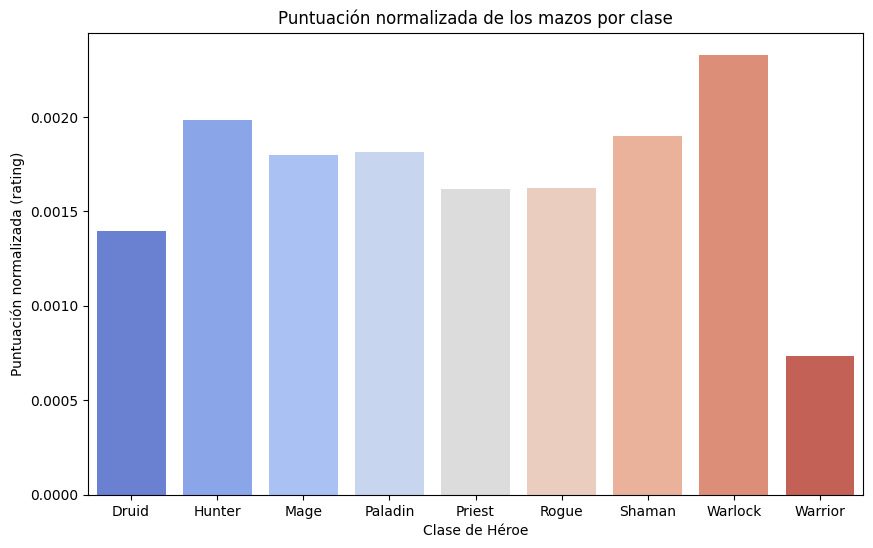

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data['rating_scaled'] = data.groupby('deck_class')['rating'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

promedio_normalizado_por_clase = data.groupby('deck_class')['rating_scaled'].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=promedio_normalizado_por_clase.index, y=promedio_normalizado_por_clase.values, palette='coolwarm')

plt.title('Puntuación normalizada de los mazos por clase')
plt.ylabel('Puntuación normalizada (rating)')
plt.xlabel('Clase de Héroe')

plt.show()

### Puntuaciones sin Outliers

<ipython-input-31-092adcd5e54c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_filtrado_por_clase.index, y=promedio_filtrado_por_clase.values, palette='coolwarm')


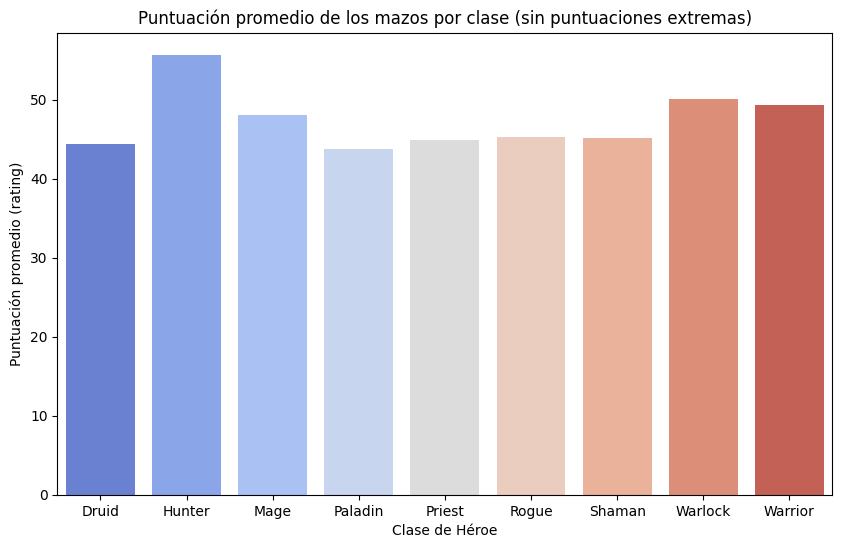

In [31]:
df_filtrado = data[data['rating'] > 5]

promedio_filtrado_por_clase = df_filtrado.groupby('deck_class')['rating'].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=promedio_filtrado_por_clase.index, y=promedio_filtrado_por_clase.values, palette='coolwarm')

plt.title('Puntuación promedio de los mazos por clase (sin puntuaciones extremas)')
plt.ylabel('Puntuación promedio (rating)')
plt.xlabel('Clase de Héroe')

plt.show()

## 5. Cantidad de mazos entre ciertos rangos de puntuación

<ipython-input-32-715c0233596c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_por_rango.index, y=conteo_por_rango.values, palette=colores_clases.get(clase, 'Blues_d'))


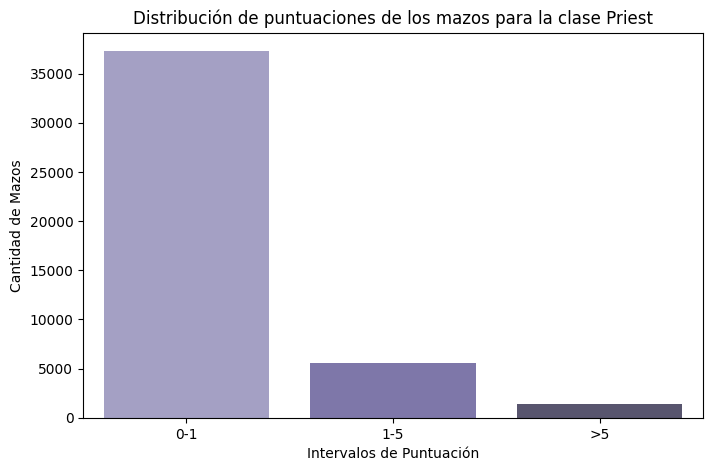

<ipython-input-32-715c0233596c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_por_rango.index, y=conteo_por_rango.values, palette=colores_clases.get(clase, 'Blues_d'))


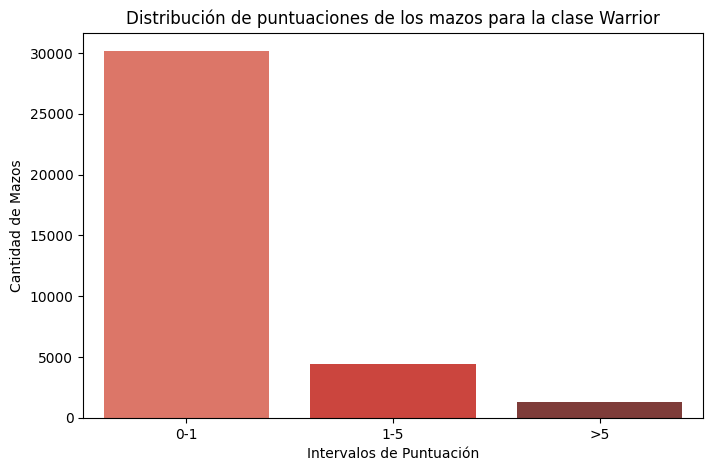

<ipython-input-32-715c0233596c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_por_rango.index, y=conteo_por_rango.values, palette=colores_clases.get(clase, 'Blues_d'))


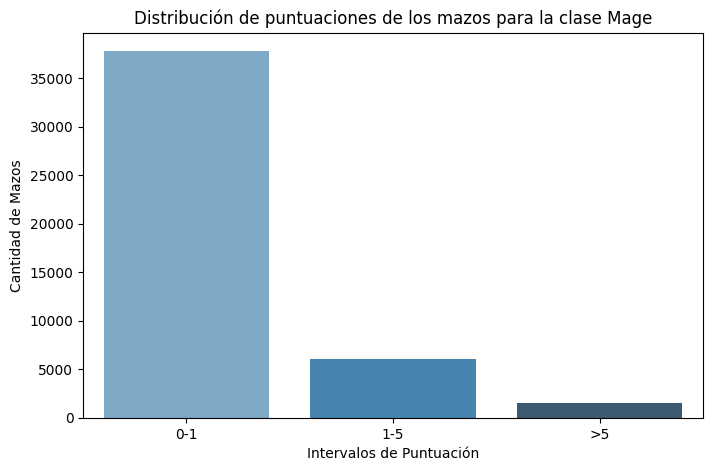

<ipython-input-32-715c0233596c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_por_rango.index, y=conteo_por_rango.values, palette=colores_clases.get(clase, 'Blues_d'))


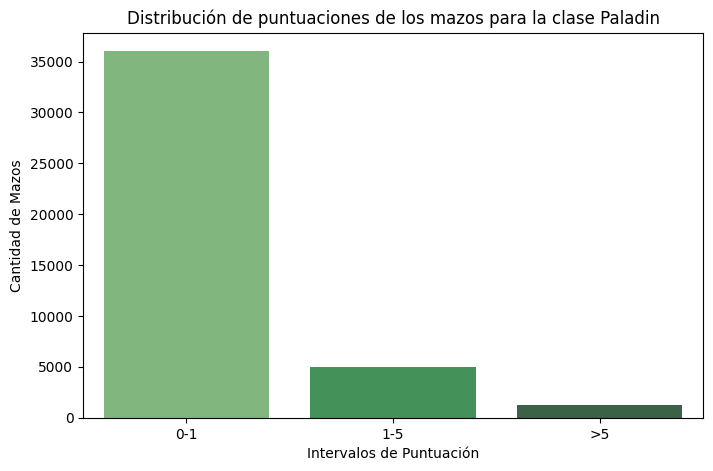

<ipython-input-32-715c0233596c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_por_rango.index, y=conteo_por_rango.values, palette=colores_clases.get(clase, 'Blues_d'))


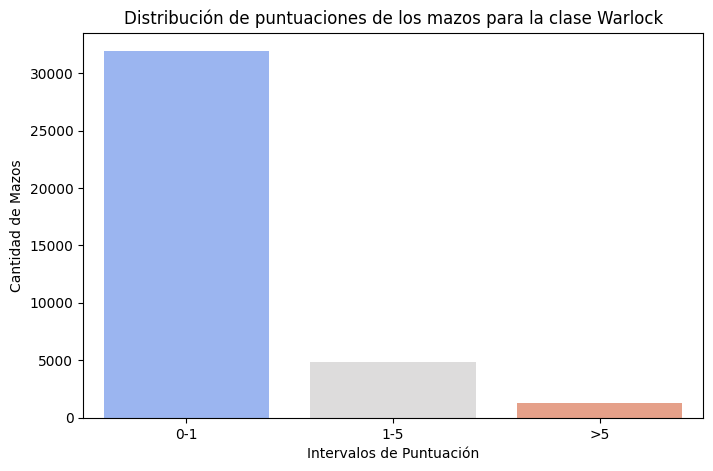

<ipython-input-32-715c0233596c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_por_rango.index, y=conteo_por_rango.values, palette=colores_clases.get(clase, 'Blues_d'))


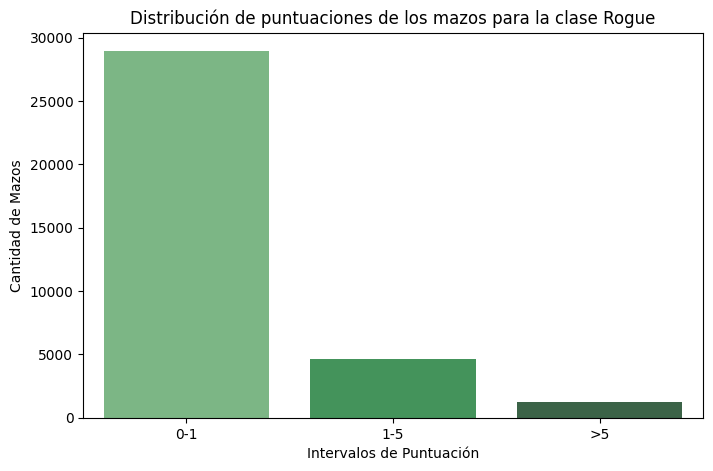

<ipython-input-32-715c0233596c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_por_rango.index, y=conteo_por_rango.values, palette=colores_clases.get(clase, 'Blues_d'))


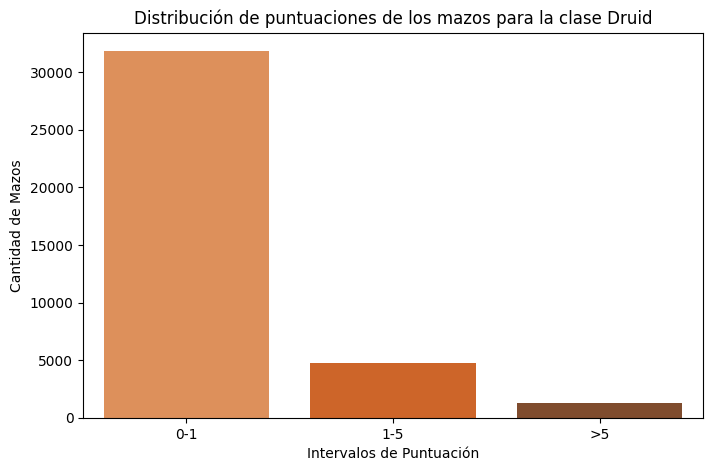

<ipython-input-32-715c0233596c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_por_rango.index, y=conteo_por_rango.values, palette=colores_clases.get(clase, 'Blues_d'))


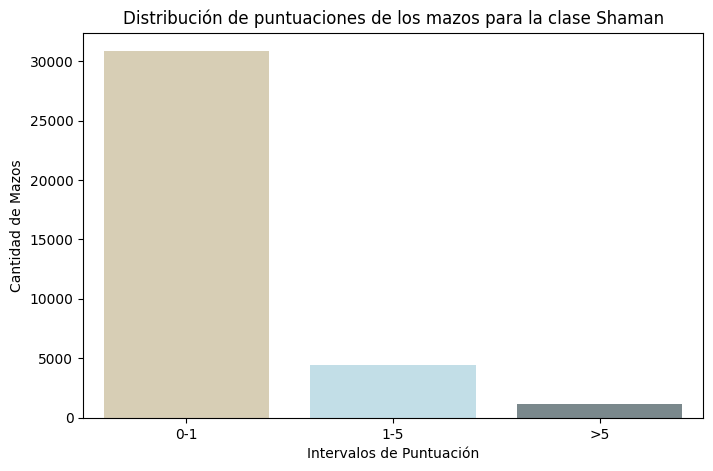

<ipython-input-32-715c0233596c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_por_rango.index, y=conteo_por_rango.values, palette=colores_clases.get(clase, 'Blues_d'))


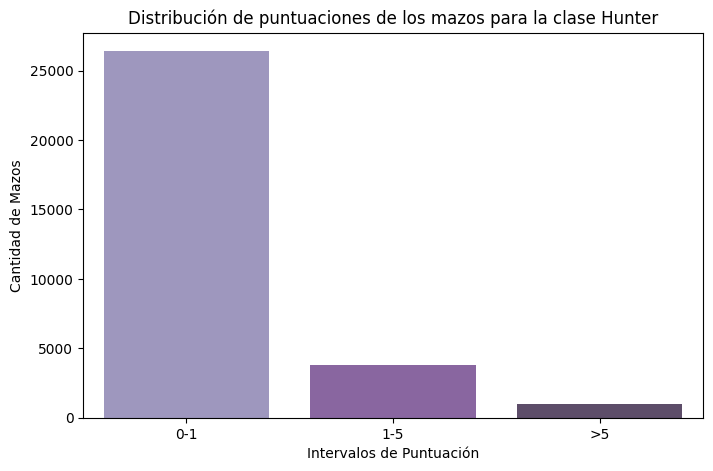

In [32]:
bins = [0, 1, 5, data['rating'].max()]
labels = ['0-1', '1-5', '>5']

data['rating_range'] = pd.cut(data['rating'], bins=bins, labels=labels, include_lowest=True)

clases = data['deck_class'].unique()

for clase in clases:
    data_clase = data[data['deck_class'] == clase]

    if data_clase.empty:
        continue

    conteo_por_rango = data_clase['rating_range'].value_counts().reindex(labels, fill_value=0)

    plt.figure(figsize=(8,5))
    sns.barplot(x=conteo_por_rango.index, y=conteo_por_rango.values, palette=colores_clases.get(clase, 'Blues_d'))

    plt.title(f'Distribución de puntuaciones de los mazos para la clase {clase}')
    plt.xlabel('Intervalos de Puntuación')
    plt.ylabel('Cantidad de Mazos')

    plt.show()